# XC Functional and Hubbard U tests
## Supplemental material for _Covalent charge-neutral muon state in antiferromagnetic MnF<sub>2</sub>_

M. H. Dehn,<sup>1,2,3 </sup> R. Scheuermann,<sup>4</sup> J. K. Shenton,<sup>5,*</sup>  S. J. Blundell,<sup>6</sup> W. A. MacFarlane,<sup>2,3,7</sup> D. Prabhakaran,<sup>6</sup> A. Suter,<sup>4</sup> N. A. Spaldin<sup>5</sup>and R. F. Kiefl<sup>1,2,3,&sect;</sup>


<sup>1</sup>Department of Physics and Astronomy, University of British Columbia, Vancouver, BC V6T 1Z1, Canada    
<sup>2</sup>Stewart Blusson Quantum Matter Institute, University of British Columbia, Vancouver, BC V6T 1Z4, Canada    
<sup>3</sup><span style="font-variant:small-caps;">Triumf</span>, Vancouver, BC V6T 2A3, Canada   
<sup>4</sup>Laboratory for Muon Spectroscopy, Paul Scherrer Institute, Villigen AG, Switzerland    
<sup>5</sup>Department of Materials, ETH Zurich, CH-8093 Zürich, Switzerland   
<sup>6</sup>Oxford University Department of Physics, Clarendon Laboratory, Parks Road, Oxford OX1 3PU, United Kingdom   
<sup>7</sup>Department of Chemistry, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada    
<sup>*</sup> For queries about the supplemental material in this repository contact [J. Kane Shenton](mailto:kane.shenton@stfc.ac.uk).

### Summary

We conducted a number of tests of the effects of the choice of Hubbard U applied to the Mn _d_ states on the predicted properties of MnF<sub>2</sub>. We apply U corrections to three different exchange-correlation (XC) functionals: LDA, PBEsol and SCAN and examine the effects on the crystal structure, band structure and <sup>19</sup>F hyperfine coupling.

From these tests, we identify the PBESol functional with a $U\mathrm{_{eff}}$ correction in the range 2-4 eV as providing a reasonable description of MnF<sub>2</sub> for the purposes of this study. 


### Computational Details
The following computational setup was used throughout the following tests of the Hubbard U parameter:

* DFT code: VASP version 5.4.4
* Plane-wave cutoff energy: 600 eV
* 4x4x6 k-point mesh was used for all except the bands and DOS calculations. For the DOS, a 9x9x11 mesh was used.
* Exchange-correlation functional: PBEsol
* Hubbard correction scheme: Dudarev ($U\mathrm{_{eff}}=U-J$)
* Maximum force tolerance: 5 meV/Å
* The following PAWs were used:
  * `Mn : PAW_PBE Mn_pv 02Aug2007`
  * `F  : PAW_PBE F 08Apr2002`


Further details can be found by inspecting the provided INCAR, KPOINTS, POSCAR, vasprun.xml or OUTCAR files for each XC/ $U\mathrm{_{eff}}$ value in the subdirectory: `hubbard_u_test`.

### Setup 

In [1]:
from ase.io import read, write
from ase import Atoms

import numpy as np
import re

from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.io.vasp import Vasprun
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('./plots_style.mplstyle')

# add utils.py to path
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



from utils import get_mags, set_mags, get_hyperfine, plotbanddos

%load_ext autoreload
%autoreload 2

In [2]:
basedir = './'
# Range of Ueff values highlighted in paper:
PBESol_U_RANGE_CHOSEN = [2,4] # eV 

### Lattice Constants

In [3]:
# Experimental results from 10.1107/S0108768190008370
# (Neutrons @ 15 K)
experimental_a = 4.8736
experimental_c = 3.3000

Reading in the computed results:

In [4]:
# read in results
functionals = ['lda', 'pbesol', 'scan']
Ueffs = range(0, 10, 2)
colors = ['C0', 'C1', 'C2']
markers = ['o', '^', 's']
lattice_a_res = {}
lattice_c_res = {}

for xc in functionals:
    lattice_a = []
    lattice_c = []
    for U_Mn in Ueffs:
        directory = f'{basedir}/hubbard_u_test/{xc}/Ueff_Mn-{U_Mn}/scf/'
        atoms = read(directory + 'OUTCAR')
        a,b,c = atoms.get_cell_lengths_and_angles()[:3]
        lattice_a.append(a)        
        lattice_c.append(c)
    lattice_a_res[xc] = lattice_a
    lattice_c_res[xc] = lattice_c



/home/jks/miniconda3/envs/mnf2_paper/lib/python3.10/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.cellpar() instead
  warnings.warn(warning)


**_a_ parameter**

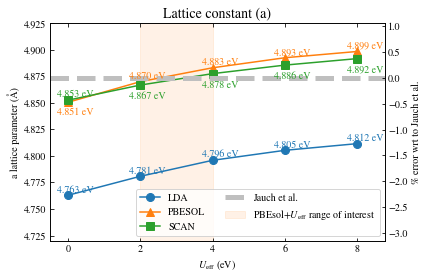

In [5]:
# plot
fig, ax = plt.subplots()


for ixc, xc in enumerate(functionals):
    ax.plot(Ueffs, lattice_a_res[xc],
           marker = markers[ixc],
           markersize = 8,
           label = xc.upper())

    # create text annotations.
    for i in range(len(Ueffs)):
        if xc == 'scan':
            offsetlabel = -0.006
            if i ==0:
                offsetlabel = 0.01
        elif xc == 'pbesol' and i == 0:
            offsetlabel = -0.005
        else:
            offsetlabel =  0.01
        text = ax.text(Ueffs[i]-0.3,
                       lattice_a_res[xc][i]+offsetlabel,
                       "{0:2.3f} eV".format(lattice_a_res[xc][i]),
                       ha="left", va="top", color=colors[ixc])

        
# experimental line:
ax.axhline(experimental_a,
           linewidth=5,
           linestyle = '--',
           color = '0.75',
           label='Jauch et al.')

# add a bit of padding for the text annotations.
ax.set_xlim(Ueffs[0] - 0.5, Ueffs[-1]+0.75)
ax.set_ylim(4.72, 4.925)

# Highlight Ueff values in paper
ax.axvspan(PBESol_U_RANGE_CHOSEN[0],
           PBESol_U_RANGE_CHOSEN[1],
           color='C1',
           alpha=0.1,
           label=r'PBEsol+$U\mathrm{_{eff}}$ range of interest')



# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_a) / experimental_a
y2_rel = 100*(y2 - experimental_a) / experimental_a

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Jauch et al.')


ax.legend(ncol=2, loc=4)
ax.set_xlabel(r"$U\mathrm{_{eff}}$ (eV)")
ax.set_ylabel("a lattice parameter (Å)")
ax.set_title('Lattice constant (a)');

**_c_ parameter**

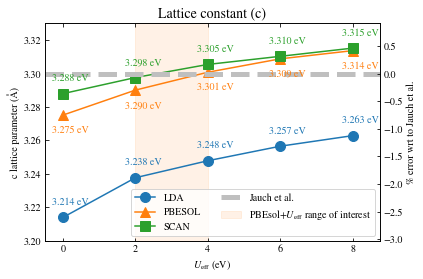

In [6]:
# plot
fig, ax = plt.subplots()

for ixc, xc in enumerate(functionals):
    ax.plot(Ueffs, lattice_c_res[xc],
           marker = markers[ixc],
           label = xc.upper())

    for i in range(len(Ueffs)):
        if xc == 'pbesol':
            offsetlabel = -0.006
        else:
            offsetlabel =  0.012
        text = ax.text(Ueffs[i]-0.3,
                        lattice_c_res[xc][i]+offsetlabel,
                        "{0:2.3f} eV".format(lattice_c_res[xc][i]),
                       ha="left", va="top", color=colors[ixc])

        
# experimental line:
ax.axhline(experimental_c,
            linewidth=5,
            linestyle = '--', 
            color = '0.75', 
            label='Jauch et al.')

# Highlight Ueff values in paper
ax.axvspan(PBESol_U_RANGE_CHOSEN[0],
           PBESol_U_RANGE_CHOSEN[1],
           color='C1',
           alpha=0.1,
           label=r'PBEsol+$U\mathrm{_{eff}}$ range of interest')


# add a bit of padding for the text annotations.
ax.set_xlim(Ueffs[0] - 0.5, Ueffs[-1]+0.75)
ax.set_ylim(3.2, 3.33)

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_c) / experimental_c
y2_rel = 100*(y2 - experimental_c) / experimental_c

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Jauch et al.')


ax.legend(ncol=2)
ax.set_xlabel(r"$U\mathrm{_{eff}}$ (eV)")
ax.set_ylabel("c lattice parameter (Å)");
ax.set_title('Lattice constant (c)');

**Magnetic moments**

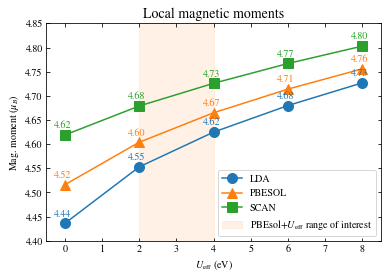

In [7]:
# read in results
functionals = ['lda', 'pbesol', 'scan']
Ueffs = range(0, 10, 2)
colors = ['C0', 'C1', 'C2']
markers = ['o', '^', 's']
magmoms_res = {}

for xc in functionals:
    magmoms = []
    for U_Mn in Ueffs:
        directory = f'{basedir}/hubbard_u_test/{xc}/Ueff_Mn-{U_Mn}/dos_nosym/'
        mags = get_mags(directory + 'OUTCAR', natoms = 6)[0]
        magmoms.append(mags[1])
    magmoms_res[xc] = magmoms

    
# plot
fig, ax = plt.subplots()

for ixc, xc in enumerate(functionals):
    ax.plot(Ueffs, magmoms_res[xc],
           marker = markers[ixc],
           label = xc.upper())

    # create text annotations.
    for i in range(len(Ueffs)):
        offsetlabel = 0.03
        
        text = ax.text(Ueffs[i]-0.3,
                        magmoms_res[xc][i]+offsetlabel,
                        "{0:2.2f}".format(magmoms_res[xc][i]),
                        ha="left",
                        va="top",
                        color=colors[ixc])

# Highlight Ueff values in paper
ax.axvspan(PBESol_U_RANGE_CHOSEN[0],
           PBESol_U_RANGE_CHOSEN[1],
           color='C1',
           alpha=0.1,
           label=r'PBEsol+$U\mathrm{_{eff}}$ range of interest')


# add a bit of padding for the text annotations.
ax.set_xlim(Ueffs[0] - 0.5, Ueffs[-1]+0.5)
ax.set_ylim(4.4, 4.85)


ax.legend()
ax.set_xlabel(r"$U\mathrm{_{eff}}$ (eV)")
ax.set_ylabel("Mag. moment ($\mu_B$)")
ax.set_title('Local magnetic moments');

## Density of states & band structure results

Read in results. This might take a while (~30s on my machine) a use a fair bit of RAM... 

In [8]:
functionals = ['lda', 'pbesol', 'scan']
# functionals = ['lda']#, 'pbesol', 'scan']
Ueffs = range(0, 10, 2)


dosruns_all = {}
bandsruns_all = {}
kpts_files_all = {}

for xc in functionals:
    dosruns   = []
    bandsruns = []
    kpts_files = []
    for u in Ueffs:
        dospath   = f'{basedir}/hubbard_u_test/{xc}/Ueff_Mn-{u}/dos_nosym/vasprun.xml'
        bandspath = f'{basedir}/hubbard_u_test/{xc}/Ueff_Mn-{u}/bands_nosym/vasprun.xml'
        kpts_filepath = f'{basedir}/hubbard_u_test/{xc}/Ueff_Mn-{u}/bands_nosym/KPOINTS'

        
        dosruns.append(Vasprun(dospath,
                                   parse_potcar_file = False))
        bandsruns.append(Vasprun(bandspath,
                                     parse_projected_eigen=True,
                                     parse_potcar_file = False))
        kpts_files.append(kpts_filepath)
        
        
    dosruns_all[xc]   = dosruns
    bandsruns_all[xc] = bandsruns
    kpts_files_all[xc] = kpts_files
    

#### Band gaps

In [9]:

print('XC\t Ueff (eV)\t Band gap (eV)\t Direct gap?')
print('----------------------------------------------------')
for xc in functionals:
    for iu, u in enumerate(Ueffs):
        bandsrun = bandsruns_all[xc][iu]
        kpath = kpts_files_all[xc][iu]
        bands   = bandsrun.get_band_structure(kpath,
                                            line_mode = False)
        
        gap = bands.get_band_gap()
        print(f'{xc.upper()}\t\t {u}\t {gap["energy"]:4.3f}\t\t {gap["direct"]}')
    print()

XC	 Ueff (eV)	 Band gap (eV)	 Direct gap?
----------------------------------------------------
LDA		 0	 1.761		 False
LDA		 2	 2.505		 False
LDA		 4	 3.160		 False
LDA		 6	 3.737		 False
LDA		 8	 4.228		 False

PBESOL		 0	 2.057		 False
PBESOL		 2	 2.768		 False
PBESOL		 4	 3.409		 False
PBESOL		 6	 3.972		 False
PBESOL		 8	 4.450		 False

SCAN		 0	 3.283		 False
SCAN		 2	 3.870		 False
SCAN		 4	 4.379		 False
SCAN		 6	 4.813		 False
SCAN		 8	 5.174		 False



Plot all the bands and DOS:

In [10]:
for xc in functionals:
    for u in Ueffs:
        print('xc: ', xc, 'Ueff: ', u)
        plotbanddos(u = u,
                    xc = xc,
                   dosruns_all = dosruns_all,
                   bandsruns_all = bandsruns_all,
                   kpaths_all = kpts_files_all)

xc:  lda Ueff:  0
0
Getting element projected DOS
Importing bands run
xc:  lda Ueff:  2
1
Getting element projected DOS
Importing bands run
xc:  lda Ueff:  4
2
Getting element projected DOS
Importing bands run
xc:  lda Ueff:  6
3
Getting element projected DOS
Importing bands run
xc:  lda Ueff:  8
4
Getting element projected DOS
Importing bands run
xc:  pbesol Ueff:  0
0
Getting element projected DOS
Importing bands run
xc:  pbesol Ueff:  2
1
Getting element projected DOS
Importing bands run
xc:  pbesol Ueff:  4
2
Getting element projected DOS
Importing bands run
xc:  pbesol Ueff:  6
3
Getting element projected DOS
Importing bands run
xc:  pbesol Ueff:  8
4
Getting element projected DOS
Importing bands run
xc:  scan Ueff:  0
0
Getting element projected DOS
Importing bands run
xc:  scan Ueff:  2
1
Getting element projected DOS
Importing bands run
xc:  scan Ueff:  4
2
Getting element projected DOS
Importing bands run
xc:  scan Ueff:  6
3
Getting element projected DOS
Importing bands run
x

Below we plot the projected DOS and Bands for each combination of XC functional and Hubbard U. 

Note that for the projected bands, we show both spin-up (blue) and spin-down (green) Mn contributions - you can see the strange spin splitting that was discussed by [Yuan et al.](https://doi.org/10.1103/PhysRevB.102.014422)

I wrote my own scripts to make these plots, but going forward I would recommend the [sumo library](https://doi.org/10.21105/joss.00717). 


We can use [ImageMagick](https://imagemagick.org/index.php) to convert these into a nice animation for each functional:


In [11]:
# # -------- pbands and DOS gif -------- #
# !convert  -layers TrimBounds \
#           -loop 0 \
#           -delay 80 \
#           -dispose previous \
#           images/lda_banddos_Ueff?.png \
#           images/lda_banddos.gif

# !convert  -layers TrimBounds \
#           -loop 0 \
#           -delay 80 \
#           -dispose previous \
#           images/pbesol_banddos_Ueff?.png \
#           images/pbesol_banddos.gif

# !convert  -layers TrimBounds \
#           -loop 0 \
#           -delay 80 \
#           -dispose previous \
#           images/scan_banddos_Ueff?.png \
#           images/scan_banddos.gif


<table>
<thead>
  <tr>
    <th width="30%">LDA+U</th>
    <th width="30%">PBESol+U</th>
    <th width="30%">SCAN+U</th>
  </tr>
</thead>
<tbody>
  <tr>
    <th width="30%"><img src="./images/lda_banddos.gif" alt="LDA Band and DOS"></th>
    <th width="30%"><img src="./images/pbesol_banddos.gif" alt="PBEsol Band and DOS"></th>
    <th width="30%"><img src="./images/scan_banddos.gif" alt="SCAN Band and DOS"></th>
  </tr>
</tbody>
</table>


Or you can display all of the bands/DOS in one big table:



<style type="text/css">
.tg  {border:none;border-collapse:collapse;border-color:#FDF6E3;border-spacing:0;}
.tg td{background-color:#ffffff;border-color:#FDF6E3;border-style:solid;border-width:0px;color:#444;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#3fb950;border-color:#FDF6E3;border-style:solid;border-width:0px;color:#fff;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:center;vertical-align:center;width:10%}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:center;width:30%}
img {
    width: 100%;
    height: 100%;
    border: 1px solid hotpink;
    object-fit: contain;
}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Ueff (eV)</th>
    <th class="tg-0pky">LDA+U</th>
    <th class="tg-0pky">PBESol+U</th>
    <th class="tg-0lax">SCAN+U</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0pky"><img src="images/lda_banddos_Ueff0.png" alt="lda_banddos_Ueff0" ></td>
    <td class="tg-0pky"><img src="images/pbesol_banddos_Ueff0.png" alt="pbesol_banddos_Ueff0" ></td>
    <td class="tg-0pky"><img src="images/scan_banddos_Ueff0.png" alt="scan_banddos_Ueff0" ></td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0pky"><img src="images/lda_banddos_Ueff2.png" alt="lda_banddos_Ueff2" ></td>
    <td class="tg-0pky"><img src="images/pbesol_banddos_Ueff2.png" alt="pbesol_banddos_Ueff2" ></td>
    <td class="tg-0pky"><img src="images/scan_banddos_Ueff2.png" alt="scan_banddos_Ueff2" ></td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0pky"><img src="images/lda_banddos_Ueff4.png" alt="lda_banddos_Ueff4" ></td>
    <td class="tg-0pky"><img src="images/pbesol_banddos_Ueff4.png" alt="pbesol_banddos_Ueff4" ></td>
    <td class="tg-0pky"><img src="images/scan_banddos_Ueff4.png" alt="scan_banddos_Ueff4" ></td>
  </tr>
  <tr>
    <td class="tg-0lax">6</td>
    <td class="tg-0pky"><img src="images/lda_banddos_Ueff6.png" alt="lda_banddos_Ueff6" ></td>
    <td class="tg-0pky"><img src="images/pbesol_banddos_Ueff6.png" alt="pbesol_banddos_Ueff6" ></td>
    <td class="tg-0pky"><img src="images/scan_banddos_Ueff6.png" alt="scan_banddos_Ueff6" ></td>
  </tr>
  <tr>
    <td class="tg-0lax">8</td>
    <td class="tg-0pky"><img src="images/lda_banddos_Ueff8.png" alt="lda_banddos_Ueff8" ></td>
    <td class="tg-0pky"><img src="images/pbesol_banddos_Ueff8.png" alt="pbesol_banddos_Ueff8" ></td>
    <td class="tg-0pky"><img src="images/scan_banddos_Ueff8.png" alt="scan_banddos_Ueff8" ></td>
  </tr>
</tbody>
</table>

## Hyperfine interactions

Experimental reference:


Jaccarino, V., and R. G. Shulman. ‘Observation of Nuclear Magnetic Resonance in Antiferromagnetic M n ( F 19 ) 2’. Physical Review 107, no. 4 (15 August 1957): 1196–97. https://doi.org/10.1103/PhysRev.107.1196.

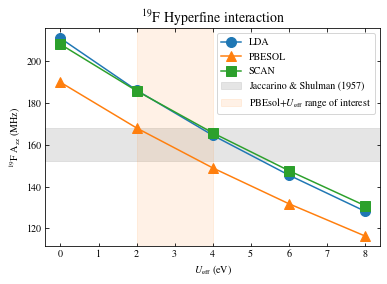

In [12]:
# read in results
chosen_atom = 2 # Fluorine
functionals = ['lda', 'pbesol', 'scan']
Ueffs = range(0, 10, 2)
colors = ['C0', 'C1', 'C2']
markers = ['o', '^', 's']
A_zz_res = {}



for xc in functionals:
    A_zz = []
    for U_Mn in Ueffs:
        directory = f'{basedir}/hubbard_u_test/{xc}/Ueff_Mn-{U_Mn}/hfi/'
        atoms = read(directory + 'OUTCAR')
        natoms=  len(atoms)
        A = get_hyperfine(directory+'OUTCAR', natoms=natoms, chosen_atom=chosen_atom, verbose=False)
        # High-field limit:
        A = A / 2
        A_zz.append(A[2][2])
    A_zz_res[xc] = A_zz
    
# plot
fig, ax = plt.subplots()


for ixc, xc in enumerate(functionals):
    ax.plot(Ueffs, A_zz_res[xc],
           marker = markers[ixc],
           label = xc.upper())

# create text annotations.
ax.axhspan(152, 168, color = '0.8', alpha=0.5, label="Jaccarino & Shulman (1957)")
# ax.text(0.0, 160, "Jaccarino & Shuiman (1957)",
#                        ha="left", va="top", color='k')

# Highlight Ueff values in paper
ax.axvspan(PBESol_U_RANGE_CHOSEN[0],
           PBESol_U_RANGE_CHOSEN[1],
           color='C1',
           alpha=0.1,
           label=r'PBEsol+$U\mathrm{_{eff}}$ range of interest')


ax.legend()
ax.set_xlabel("$U\mathrm{_{eff}}$ (eV)")
ax.set_ylabel(r"$\mathrm{^{19}F}$ $\mathrm{A_{zz}}$ (MHz)")
ax.set_title(r"$\mathrm{^{19}F}$ Hyperfine interaction");

In [13]:
natoms = len(atoms)
outcarfile = f"{basedir}/hubbard_u_test/pbesol/Ueff_Mn-4/hfi/OUTCAR"
chosen_atom = 2
A_zz = get_hyperfine(outcar=outcarfile, natoms=natoms, chosen_atom = chosen_atom);

Fermi contact: 195.651 MHz
Dipole tensor (MHz):
   -51.117      9.424     -0.000
     9.424    -51.117     -0.000
    -0.000     -0.000    102.233

Total hyperfine tensor: (MHz)
   144.534      9.424      0.000
     9.424    144.534      0.000
     0.000      0.000    297.884

Principle values and directions of the hyperfine tensor:
   135.110 Mhz    [-0.707  0.707  0.000]
   153.958 Mhz    [ 0.707  0.707  0.000]
   297.884 Mhz    [ 0.000  0.000  1.000]
